In [ ]:
install.packages("igraph")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



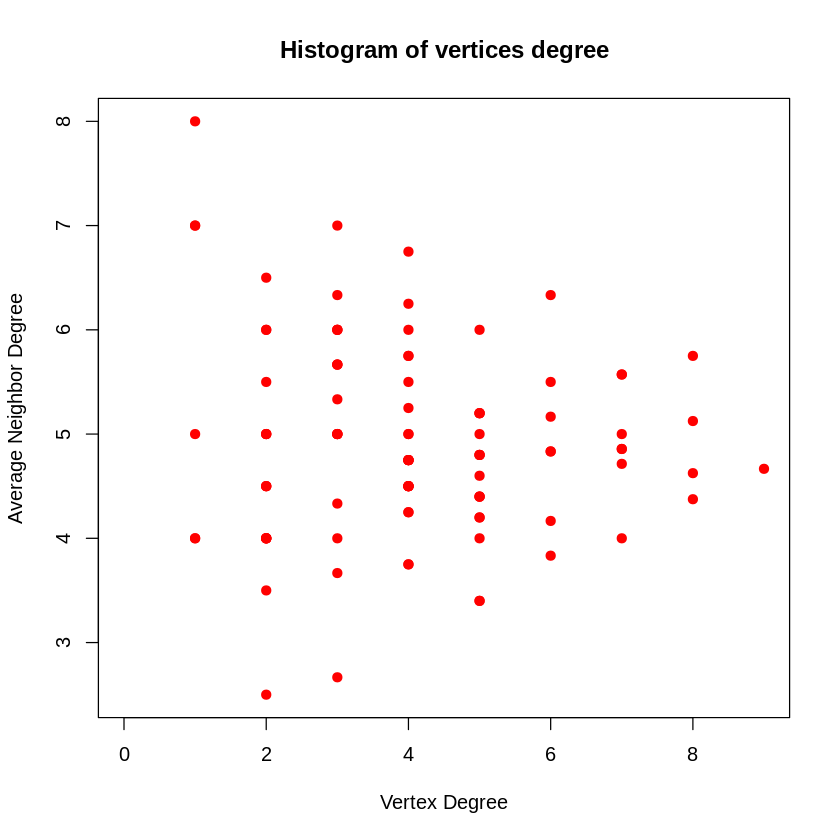

In [ ]:
# Create a random graph n=100, m=200 and plot a histogram of vertices degree.
library(igraph)
set.seed(41)
G <- erdos.renyi.game(n=100, p.or.m=200, type="gnm")
# get.adjacency(G)
ad <- knn(G, V(G))$knn
d <- degree(G)
plot(d, ad, col="red", xlab=c("Vertex Degree"), ylab=c("Average Neighbor Degree"), main = "Histogram of vertices degree", type="p", pch=19)

In [ ]:
# Create 1,000 random graphs with Erdos–Renyi model n=100, p=c*ln(n)/n  and compute the number of connected graphs for c>1.
n <- 100
c <- 1.1
p <- c * log(n)/n
count_graph <- 1000
counter <- 0
for (i in (1:count_graph)) {
  g <- erdos.renyi.game(n, p.or.m=p, type="gnp" , directed=FALSE)
  if (is_connected(g) == TRUE) counter <- counter + 1
}
print(counter)

[1] 558


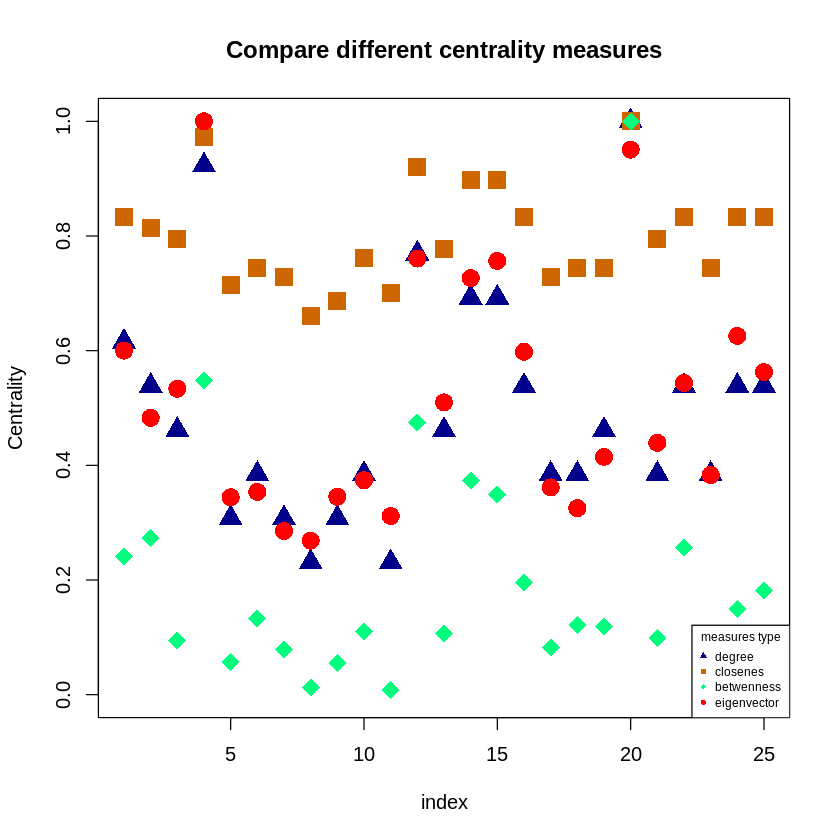

In [ ]:
# Create a random graph n=25, p=0.25 and compare different centrality measures (degree, closeness, betweenness, eigenvector) in a table or plot.
n <-25
p <-0.25
G <- erdos.renyi.game(n, p.or.m=p, type="gnp" , directed=FALSE)

cm_degree <- degree(G, loops = TRUE, normalized=FALSE)                   # The mode argument is ignored in undirected graph (mode = all) по степени
cm_degree_max <- max(cm_degree)
cm_degree <- cm_degree/cm_degree_max

cm_closeness <- closeness(G, normalized=FALSE)
cm_closeness_max <- max(cm_closeness)                                    # по близости
cm_closeness <- cm_closeness/cm_closeness_max                            # приводим к единице  

cm_betweenness <- betweenness(G, directed=TRUE, normalized=FALSE)
cm_betweenness_max <- max(cm_betweenness)                                    # по посредничеству
cm_betweenness <- cm_betweenness/cm_betweenness_max 

cm_eigenvector <- eigen_centrality(G, scale = TRUE)

par(mfrow=c(1,1))
plot(cm_degree, 
    main="Сompare different centrality measures",
    col="blue4",
    pch=17,
    type="p",
    xlab="index",
    ylab="Centrality",
    ylim=c(0,1),
    cex=2)

points(cm_closeness,
      col="darkorange3",
      pch=15,
      cex=2)

points(cm_betweenness,
      col="springgreen",
      pch=18,
      cex=2)

points(cm_eigenvector[[1]],
      col="red",
      pch=16,
      cex=2)

legend("bottomright", 
      title="measures type",
      pch=c(17, 15, 18, 16),
      legend=c("degree", "closenes", "betwenness", "eigenvector" ),
      col=c("blue4", "darkorange3", "springgreen", "red"),
      cex=0.6)

[1] 0
[1] 1
[1] 0
[1] 1
[1] 0
[1] 1
[1] 0
[1] 0
[1] 1
[1] 0
[1] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 0
[1] 1
[1] 1
[1] 0
[1] 1
[1] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 0
[1] 1
[1] 0
[1] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 0
[1] 1
[1] 1
[1] 0
[1] 1
[1] 1
[1] 1
[1] 0
[1] 1
[1] 1
[1] 1
[1] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 0
[1] 0
[1] 1
[1] 0
[1] 0
[1] 1
[1] 0
[1] 1
[1] 1
[1] 1
[1] 0
[1] 1
[1] 1
[1] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 0
[1] 1
[1] 1
[1] 0
[1] 0
[1] 1
[1] 1
[1] 0
[1] 1
[1] 0
[1] 0
[1] 1
[1] 0
[1] 0
[1] 0
[1] 0
[1] 1
[1] 0
[1] 1
[1] 0
[1] 1
[1] 0
[1] 1
[1] 0
[1] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 0
[1] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 0
[1] 0
[1] 1
[1] 0
[1] 0
[1] 1
[1] 0
[1] 1
[1] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 0
[1] 0
[1] 0
[1] 1
[1] 1
[1] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 0
[1] 0
[1] 0
[1] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 0
[1] 1
[1] 1
[1] 0
[1] 0
[1] 0
[1] 1
[1] 0
[1] 1
[1] 1
[1] 0
[1] 1
[1] 0
[1] 0
[1] 0
[1] 0
[1] 1
[1] 1
[1] 0
[1] 0
[1] 1
[1] 

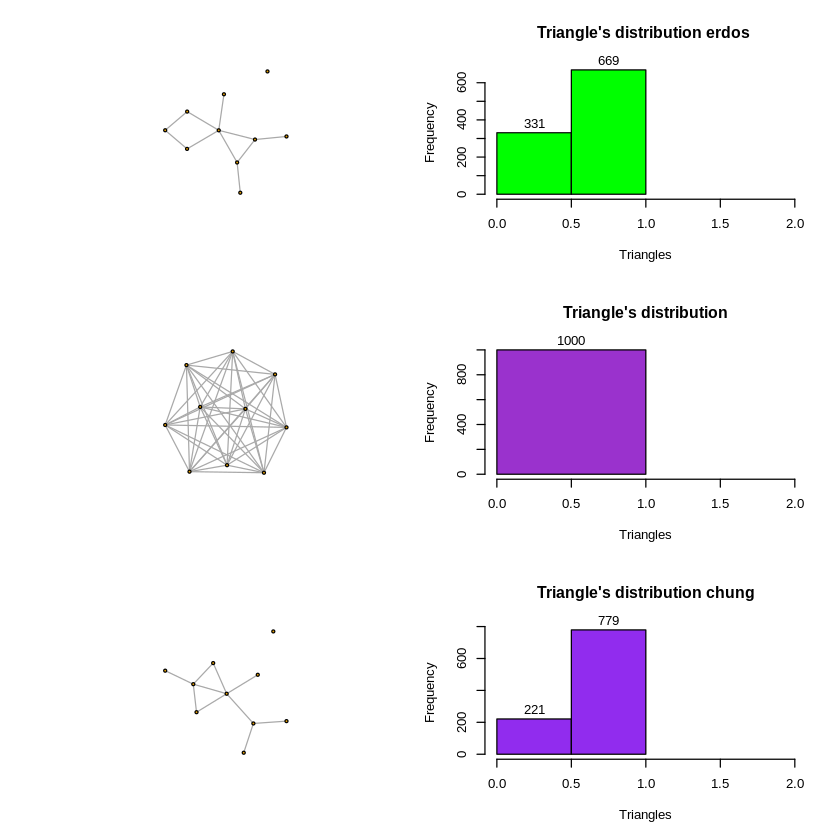

In [ ]:
#Using three random graph models (Erdos–Renyi, Barabasi-Albert, Chung-Lu), estimate a probability: a graph with 𝑛=(100, 1000, 10000) vertices and 𝑚=(𝑛, 2𝑛, 3𝑛) edges has a triangle.
library(igraph)
n <- 10
m <-  n
set.seed(41)
triangle <- graph_from_literal( A--B, B--C, C--A)
ntrials <- 1000

 ntriangles1 <- numeric(ntrials)
 ntriangles2 <- numeric(ntrials)
 ntriangles3 <- numeric(ntrials)

for (i in (1:ntrials)) {
     g_erdos <- erdos.renyi.game(n=n, p.or.m=m, type="gnm", directed=FALSE)
    g_bar <-sample_pa(n, m=m, directed=FALSE)
    g_chung <- sample_fitness_pl(n, m, 3, -1)

    g_erdos_iso <- subgraph_isomorphisms(triangle, g_erdos)
    g_bar_iso <- subgraph_isomorphisms(triangle, g_bar)
    g_chung_iso <- subgraph_isomorphisms(triangle, g_chung)
    
    motifs <- lapply(g_erdos_iso, function (x) { get.edgelist(induced_subgraph(g_erdos, x)) })
    ntriangles1[i]  <- length(unique(motifs))
    print(ntriangles1[i])

    motifs <- lapply(g_bar_iso, function (x) { get.edgelist(induced_subgraph(g_bar, x)) })
    ntriangles2[i]  <- length(unique(motifs))

    motifs <- lapply(g_chung_iso, function (x) { get.edgelist(induced_subgraph(g_chung, x)) })
    ntriangles3[i]  <- length(unique(motifs))

}

par(mfrow=c(3,2))

plot(g_erdos, vertex.label=NA, vertex.size=5)
hist(ntriangles1, freq=TRUE, labels = TRUE, breaks=3, col="green", xlim=c(0,2),main="Triangle's distribution erdos ", xlab="Triangles")
plot(g_bar, vertex.label=NA, vertex.size=5)
hist(ntriangles2, freq=TRUE, labels = TRUE, breaks=3, col="darkorchid3", xlim=c(0,2),main="Triangle's distribution", xlab="Triangles") 
plot(g_chung, vertex.label=NA, vertex.size=5)
hist(ntriangles3, freq=TRUE, labels = TRUE, breaks=3, col="purple2", xlim=c(0,2), main="Triangle's distribution chung", xlab="Triangles")





In [ ]:
city <- c("City1", "City1", "City2", "City2", "City3", "City3")
sex <- c("Male", "Female", "Male", "Female", "Male", "Female")
number <- c(12450, 10345, 5670, 5800, 25129, 26000)
CITY <- data.frame(City = city, Sex = sex, Number = number) 

Erdos-Renyi	            Barabasi-Albert	              Chung-Lu
Nodes
/edges	n	  2*n	  3*n	  n	         2*n	     3*n	    n	   2*n	3*n
100	  0,728	  0	   0	  Time out	Time out	Time out	0.961	1	   1
1000	0,755	  0	   0	  Time out	Time out	Time out	1	    1	   1


In [ ]:
CITY


City,Sex,Number
<chr>,<chr>,<dbl>
City1,Male,12450
City1,Female,10345
City2,Male,5670
City2,Female,5800
City3,Male,25129
City3,Female,26000


In [ ]:
install.packages("igraph")
n <- 88234
p <- 0.010819963503439287
count_graph <- 1000

g <- erdos.renyi.game(n, p.or.m=p, type="gnp" , directed=FALSE)

print(counter)